<a href="https://colab.research.google.com/github/Costa200513/Clasificacion-de-tumores-con-K-Nearest-Neighbors/blob/main/Clasificacion_de_tumores_con_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar el dataset**

In [49]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Relacion de las columnas**

/tmp/ipython-input-3425216114.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


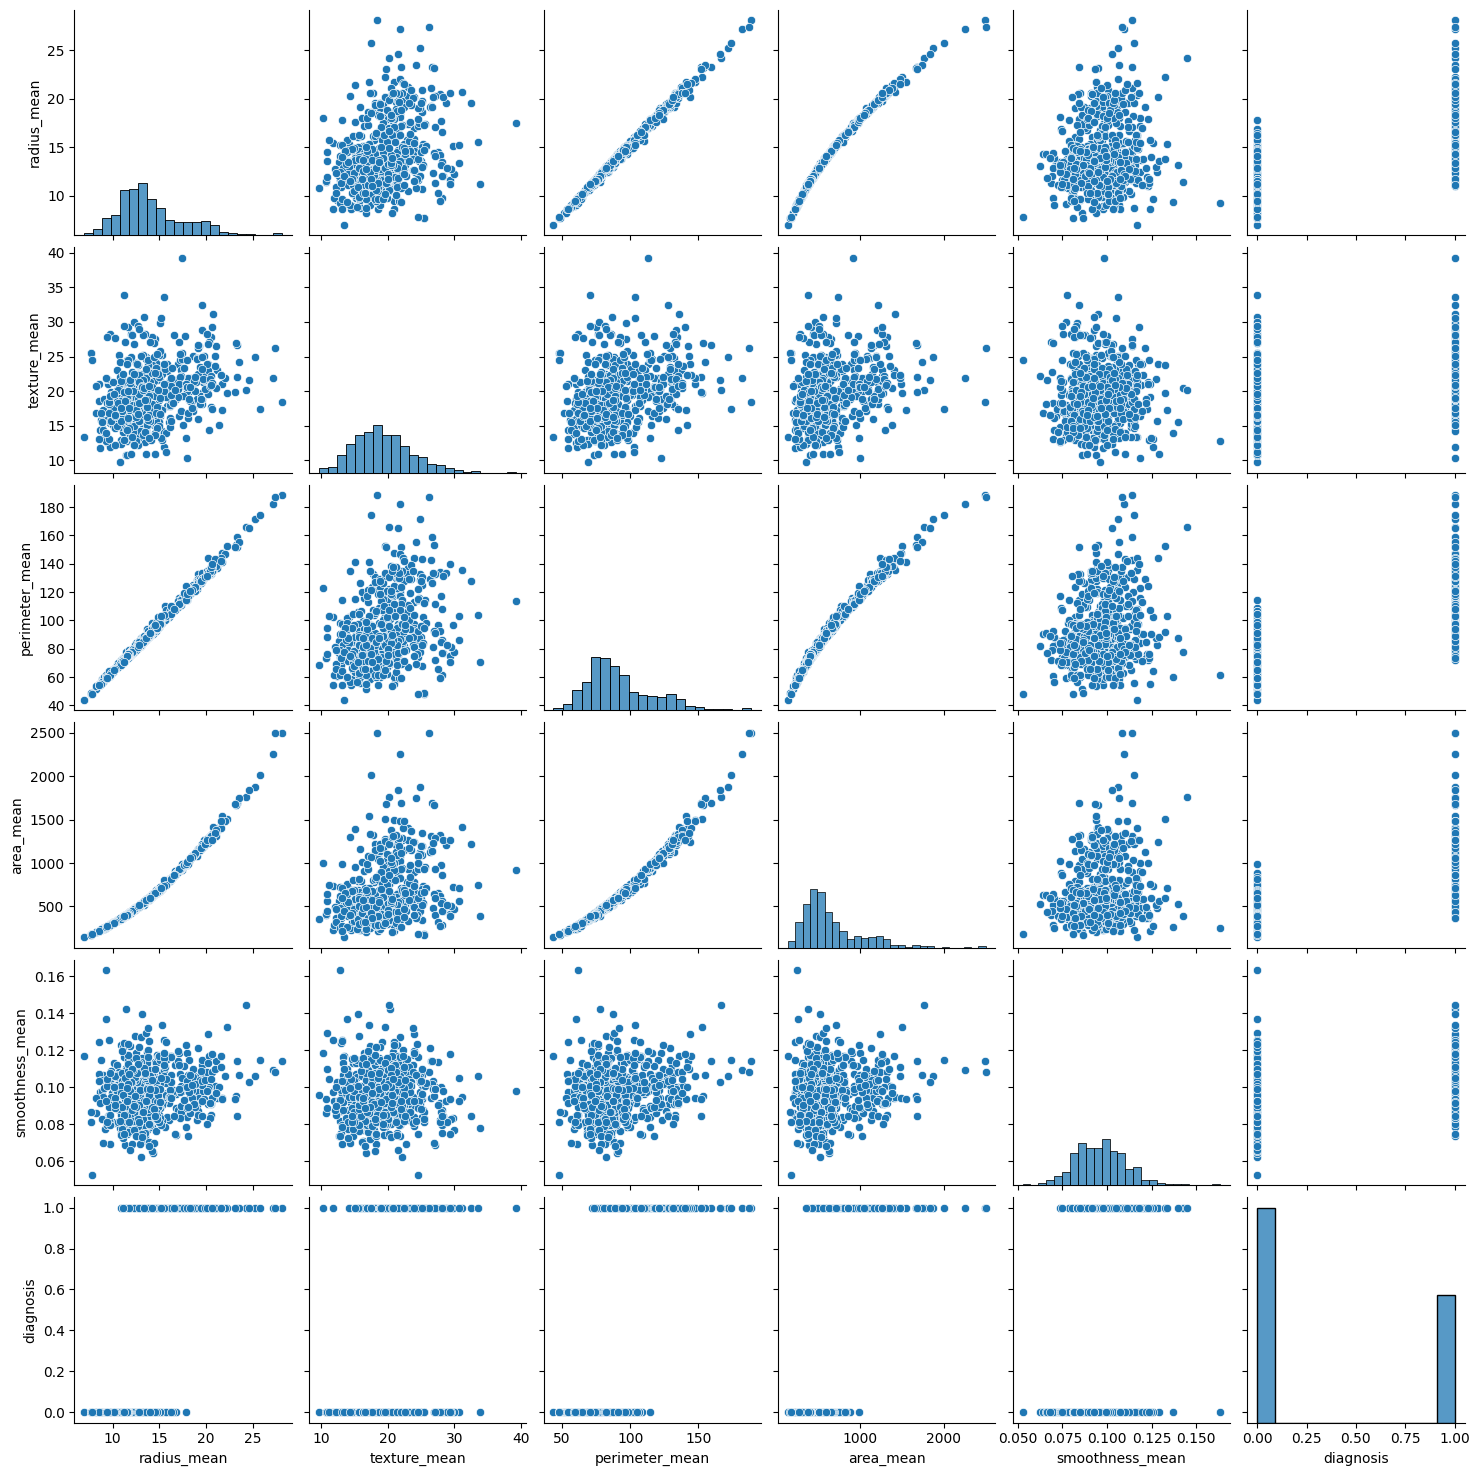

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

cols = ['radius_mean','texture_mean','perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(df[cols  ])
plt.show()

# **Mapa de calor**

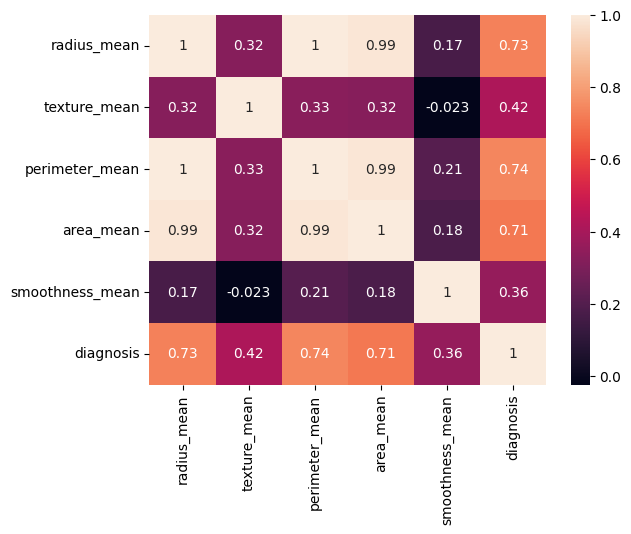

In [51]:
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

# **Preprocesamiento**

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

x=df[['radius_mean', 'perimeter_mean', 'area_mean']]
y=df['diagnosis'].replace({'B': 0, 'M': 1})

Scaler=StandardScaler()
xS=Scaler.fit_transform(x)

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(xS, y)

KNeighborsClassifier(n_neighbors=3)

#**Ingreso de datos**

In [53]:
import numpy as np
radius_mean = float(input("Ingrese promedio del radio de las celulas: "))
perimeter_mean = float(input("Ingrese promedio del perímetro de las celulas:"))
area_mean = float(input("Ingrese promedio del área de las celulas: "))

entrada = np.array([[radius_mean, perimeter_mean, area_mean]])

entrada_scaled = Scaler.transform(entrada)
prediccion = kn.predict(entrada_scaled)
if (prediccion[0]==1):
    print("Maligno")
else:
    print("Benigno")

Ingrese promedio del radio de las celulas: 1
Ingrese promedio del perímetro de las celulas:1
Ingrese promedio del área de las celulas: 1
Benigno


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Dispersión 2D: Radio vs diagnostico"**

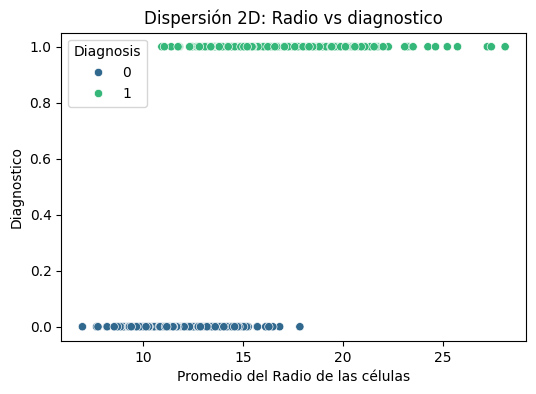

In [54]:
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="radius_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Radio vs diagnostico")
plt.xlabel("Promedio del Radio de las células")
plt.ylabel("Diagnostico")
plt.legend(title="Diagnosis")
plt.show()

# **Distribución de Radio según el Diagnóstico**

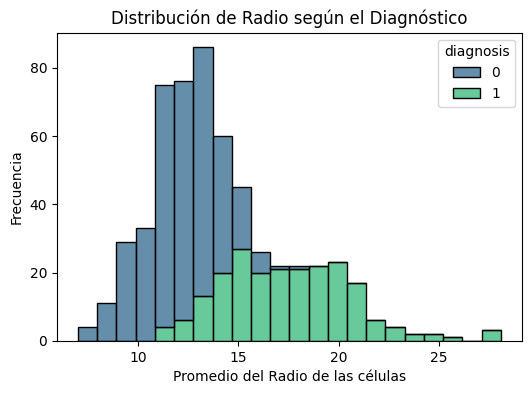

In [55]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="radius_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Radio según el Diagnóstico")
plt.xlabel("Promedio del Radio de las células")
plt.ylabel("Frecuencia")
plt.show()

#**Dispersión 2D: Perimetro vs Diagnostico**

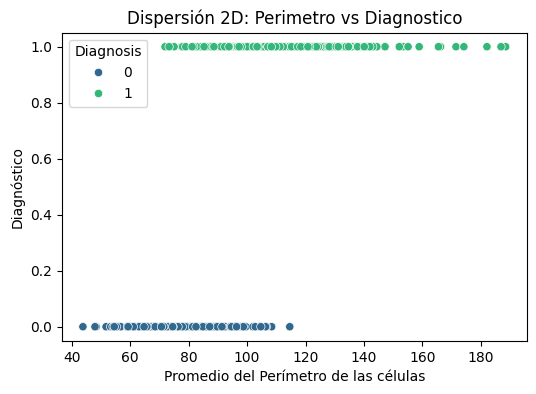

In [56]:
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="perimeter_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Perimetro vs Diagnostico")
plt.xlabel("Promedio del Perímetro de las células")
plt.ylabel("Diagnóstico")
plt.legend(title="Diagnosis")
plt.show()

# **Distribución de Perimetro según el Diagnóstico**

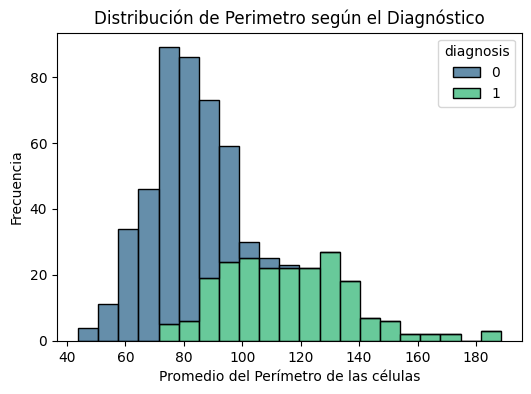

In [57]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="perimeter_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Perimetro según el Diagnóstico")
plt.xlabel("Promedio del Perímetro de las células")
plt.ylabel("Frecuencia")
plt.show()

#**Dispersión 2D: Area vs Diagnostico**

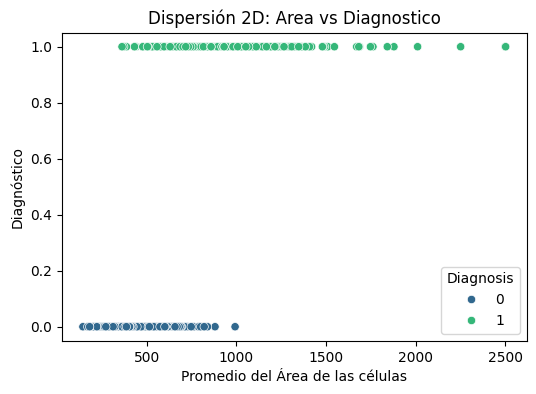

In [58]:
plt.figure(figsize=(6,4))
sb.scatterplot(data=df, x="area_mean", y="diagnosis", hue="diagnosis", palette="viridis")
plt.title("Dispersión 2D: Area vs Diagnostico")
plt.xlabel("Promedio del Área de las células")
plt.ylabel("Diagnóstico")
plt.legend(title="Diagnosis")
plt.show()

# **Distribución de Area según el Diagnóstico**

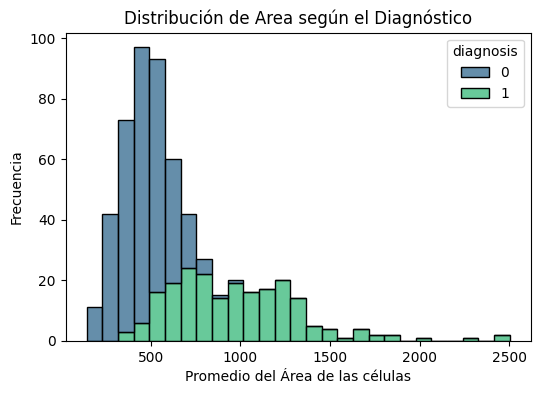

In [59]:
plt.figure(figsize=(6,4))
sb.histplot(data=df, x="area_mean", hue="diagnosis", multiple="stack", palette="viridis")
plt.title("Distribución de Area según el Diagnóstico")
plt.xlabel("Promedio del Área de las células")
plt.ylabel("Frecuencia")
plt.show()